In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from collections import OrderedDict, defaultdict


In [2]:
def f(mat):
    mat[:,2] = mat[:,0]/mat[:,1]
    return mat

In [3]:
triplet = np.zeros((100,3))

#Assigning values to Triplet
x = 1.0
y = 1.0
for i in range( len(triplet) ):
    #Setting Value of X
    triplet[i,0]=x
    #Setting value of Y
    triplet[i,1]=y
    y+=1.0
    if y==11.0:
        x+=1.0
        y=1.0

#Calculating its function values
triplet = f(triplet)
np.random.shuffle(triplet)
print (triplet)

[[10.          1.         10.        ]
 [ 5.          3.          1.66666667]
 [ 3.          1.          3.        ]
 [ 9.          9.          1.        ]
 [ 1.          3.          0.33333333]
 [ 1.          9.          0.11111111]
 [ 2.          2.          1.        ]
 [ 4.          1.          4.        ]
 [ 8.         10.          0.8       ]
 [10.          9.          1.11111111]
 [ 8.          7.          1.14285714]
 [ 5.          1.          5.        ]
 [ 1.          7.          0.14285714]
 [ 1.          4.          0.25      ]
 [ 6.          8.          0.75      ]
 [ 2.          4.          0.5       ]
 [ 9.          8.          1.125     ]
 [ 6.          2.          3.        ]
 [ 8.          9.          0.88888889]
 [ 2.          3.          0.66666667]
 [ 7.         10.          0.7       ]
 [ 3.          3.          1.        ]
 [ 5.          5.          1.        ]
 [ 3.         10.          0.3       ]
 [ 7.          3.          2.33333333]
 [ 6.         10.        

In [4]:
train_data = triplet[ :80 , :]
validate_data = triplet[80: , :] 

In [5]:
def NoFun(x):
    return x

def NoFun_Derivative(x):
    return 1

def ReLU(x):
    return np.maximum(x,0)

def ReLU_Derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def Sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

def Sigmoid_Derivative(x):
    sigm = Sigmoid(x)
    return sigm * (1. - sigm)

In [6]:
# Define Number of Layers starting from 0 (Including Input, Hidden and Output )
# So if total 6 layers write 5
layer = 5

# neuron for all Hidden layers
n = [ 2, 3, 4, 3 ]

# Activation Functions in Hidden Layer
fun = [ NoFun, ReLU, ReLU, ReLU, ReLU, Sigmoid ]

# Derivation of Activation Functions
#         Input Layer                                 Hidden Layers                             Output Layer
d_fun = [ NoFun_Derivative, ReLU_Derivative, ReLU_Derivative, ReLU_Derivative, ReLU_Derivative, Sigmoid_Derivative ]

In [7]:
def Forward( w, o, activation_fun, bias = 0 ):
    z = np.matmul( w, o )
    o = activation_fun(z+bias)
    return z,o

def ErrorFuntcion(o, y):
    '''
    index = np.argmax(o, axis = 1)
    probability = o[np.arange(len(o)), index]
    log = np.log(probability)
    Error = -1.0 * np.sum(log) / log.shape[0]
    return Error
    '''
    return ( (o-y)**2 )/2
    
def NN(train_X, train_Y):
    global layer
    global n
    global fun
    global d_fun
    ita = 0.000001
    
    # No of Inputs
    p = np.size(train_X, 1)
    
    # No of Features (of Input)
    m = np.size(train_X, 0)
    
    # No of feature (of Output)
    m_output = train_Y.shape[0]
    
    #Initializing w,o,z in all layers
    w = defaultdict(np.ndarray)
    d_w = defaultdict(np.ndarray)
    
    #b = defaultdict(np.ndarray)
    #d_b = defaultdict(np.ndarray)
    
    o = defaultdict(np.ndarray)
    z = defaultdict(np.ndarray)
    
    loss = defaultdict(np.ndarray)
    
    #Setting Array of W and derivative(W)
    w[0] = np.random.rand( n[0], m )
    d_w[0] = np.zeros(( n[0], m ))
    for i in range(1,len(n)):
        w[i] = np.random.rand( n[i], n[i-1] )
        d_w[i] = np.zeros(( n[i], n[i-1] ))
    w[layer-1] = np.random.rand( m_output, n[len(n)-1] )
    d_w[layer-1] = np.zeros( (m_output, n[len(n)-1]))
    
    w_initial = w
    
    #Setting Array of Ones and b (bias)
    '''
    for i in range(1, layer):
        #Hidden Layer starts with 1 till (layer-1)
        b[i] = np.random.rand( n[i-1], 1 )
        d_b[i] = np.random.rand( n[i-1], 1 )
    b_initial = b
    ones = np.ones( ( 1 , p ) )
    '''
    
    counter = 0
    previous_RMSE =0.1
    RMSE = 0.2;
    while int(RMSE * (10**7)) != int (previous_RMSE * (10**7)):
        counter += 1
        # Forward Calculation
        o[0] = train_X
        for l in range(1, layer+1):
            # bias = np.matmul( b[l], ones )
            z[l], o[l] = Forward(w[l-1], o[l-1], fun[l-1] )     
        
        #z[layer], o[layer] = Forward(w[layer-1], o[layer-1], fun[layer-1] )
            
        error = ErrorFuntcion(o[layer],train_Y)
        
        #Mean Square Error
        MSE = np.sum(error)        
        previous_RMSE = RMSE
        RMSE = np.sqrt(MSE) / np.size(error)
        
        loss[layer] = o[layer] - train_Y
        
        for l in range(layer-1,-1,-1):
            
            # Derivative of W
            derivative_fun = d_fun[l](z[l+1])
            
            loss_MUL_fun = np.multiply( loss[l+1], derivative_fun )
            loss[l] = np.matmul ( w[l].T, loss_MUL_fun ) 
            d_w[l] = np.matmul ( loss_MUL_fun, o[l].T )
            
            '''
            # Derivative of Bias
            d_b[l] = loss_MUL_fun
            '''
        #Update W
        for i in range(len(w)):
            w[i] -= ita * d_w[i]        
        
        '''
        #Update b
        for i in range(1, layer):
            b[i] -= ita * d_b[i]
        '''
    print ("No. of Iterations:- ",counter)
    return w, w_initial

##### Training Weights

In [8]:
train_Y = train_data[:,2]
train_Y = train_Y.reshape(( len(train_Y), 1))
train_Y = train_Y.T

train_X = train_data[:, 0:2]
train_X = train_X.T

w, w_initial = NN(train_X, train_Y)
print ("Final Weights : ", w, "\n")
print ("Initial Weights :", w_initial, "\n")


#print ("Final Bias : ", b, "\n")
#print ("Initial Bias :", b_initial, "\n")

No. of Iterations:-  48622
Final Weights :  defaultdict(<class 'numpy.ndarray'>, {0: array([[ 0.36911978, -0.33100831],
       [ 0.30975455, -1.10280022]]), 1: array([[ 0.31807128,  0.0088919 ],
       [ 0.17392014, -0.05411924],
       [ 0.43770757,  1.0447089 ]]), 2: array([[0.40539821, 0.79981536, 0.76820101],
       [0.78743207, 0.71853577, 0.48103249],
       [0.72618828, 0.52780618, 0.22372468],
       [0.64845009, 0.94308621, 0.96837899]]), 3: array([[-0.01856399, -0.01669433,  0.43585069, -0.19909969],
       [ 0.64473736,  0.84344452, -0.03733321,  0.0530046 ],
       [ 0.47425668,  0.66276684,  0.18802568,  0.94762902]]), 4: array([[0.7982825 , 0.56277458, 0.895586  ]])}) 

Initial Weights : defaultdict(<class 'numpy.ndarray'>, {0: array([[ 0.36911978, -0.33100831],
       [ 0.30975455, -1.10280022]]), 1: array([[ 0.31807128,  0.0088919 ],
       [ 0.17392014, -0.05411924],
       [ 0.43770757,  1.0447089 ]]), 2: array([[0.40539821, 0.79981536, 0.76820101],
       [0.78743207

#### Validating Weights

In [9]:
validate_Y = validate_data[:,2]
validate_Y = validate_Y.reshape(( len(validate_Y), 1))
validate_Y = validate_Y.T

validate_X = validate_data[:, 0:2]
validate_X = validate_X.T

o = validate_X
for l in range(1, layer+1):
    z, o = Forward(w[l-1], o, fun[l-1] )

predict_Y = o
print ("Predicted Result\n",predict_Y)
print ("\nActual Result\n", validate_Y)
#print ("\nPercentage Error\n",  abs(predict_Y/validate_Y)*100)

error = ErrorFuntcion(predict_Y,validate_Y)
#Mean Square Error
MSE = np.sum(error) 
RMSE = np.sqrt(MSE) / np.size(error)

print ("\nRoot Mean Square Error:",RMSE)

Predicted Result
 [[1.19220278 0.5786804  0.46881898 1.53881007 7.40842502 1.28931598
  0.46392343 1.31694982 0.35895756 2.13491146 2.10727762 0.49898818
  0.59336705 1.24747045 0.35406201 0.81308989 0.69343736 1.41406303
  0.48840119 1.09508957]]

Actual Result
 [[1.5        0.83333333 0.66666667 1.75       5.         2.5
  0.8        1.4        0.5        1.66666667 2.66666667 1.
  0.55555556 1.         0.6        0.77777778 0.85714286 2.
  0.4        1.16666667]]

Root Mean Square Error: 0.10571176839881184


Text(0, 0.5, 'Y')

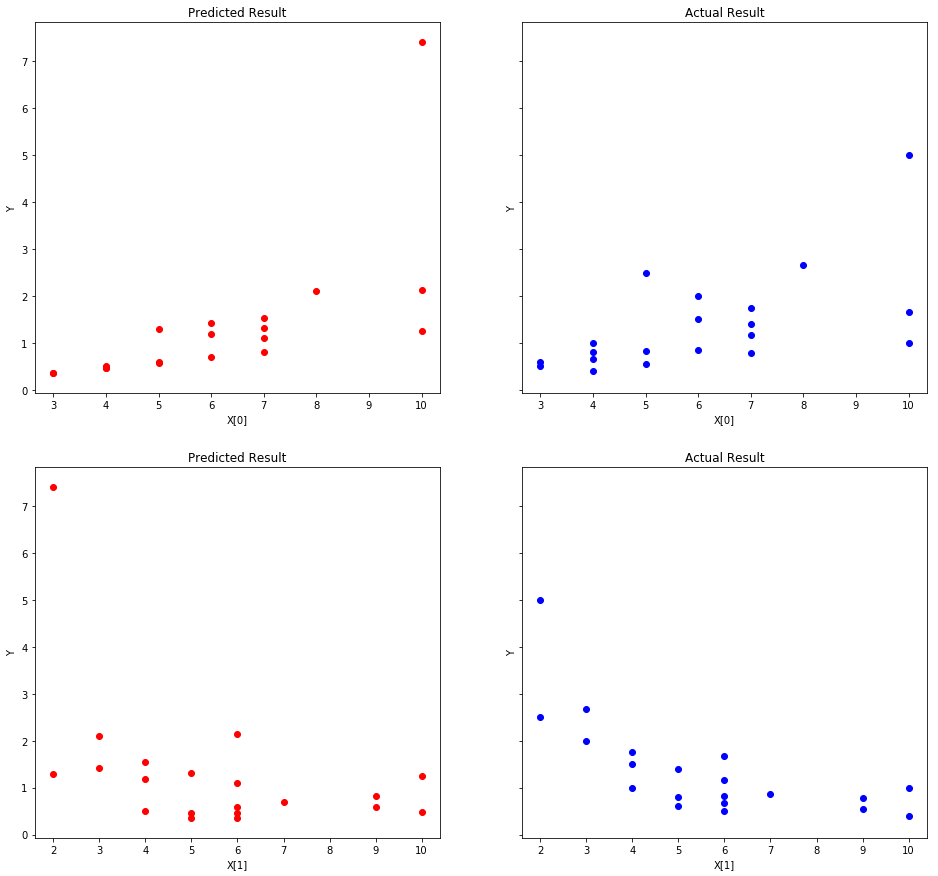

In [10]:
fig, arr = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(15)

arr[0][0].scatter (validate_X[0,:], predict_Y, c='r' )
arr[0][0].set_title('Predicted Result')
arr[0][0].set_xlabel('X[0]')
arr[0][0].set_ylabel('Y')

arr[0][1].scatter (validate_X[0,:], validate_Y, c='b' )
arr[0][1].set_title('Actual Result')
arr[0][1].set_xlabel('X[0]')
arr[0][1].set_ylabel('Y')

arr[1][0].scatter (validate_X[1,:], predict_Y, c='r' )
arr[1][0].set_title('Predicted Result')
arr[1][0].set_xlabel('X[1]')
arr[1][0].set_ylabel('Y')

arr[1][1].scatter (validate_X[1,:], validate_Y, c='b' )
arr[1][1].set_title('Actual Result')
arr[1][1].set_xlabel('X[1]')
arr[1][1].set_ylabel('Y')